In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
x = df.iloc[:,2:4]
y = df.iloc[:,-1]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [9]:
clf = LogisticRegression()

In [10]:
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
clf.score(x_test, y_test)

0.87

In [12]:
clf.coef_

array([[ 2.17864755,  1.07046781]])

In [13]:
y_pred = clf.predict(x_test)

In [14]:
accuracy_score(y_test, y_pred)

0.87

In [15]:
confusion_matrix(y_test, y_pred)

array([[64,  7],
       [ 6, 23]], dtype=int64)

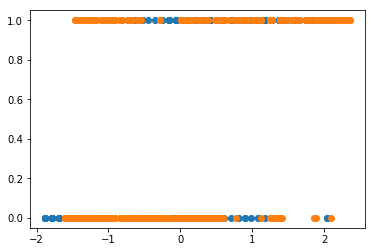

In [20]:
plt.plot(x,y,'o')
plt.show()

In [21]:
import numpy as np

In [40]:
def classifier(x):
    return 1 / (1 + np.exp(-(clf.intercept_ + clf.coef_ * x)))

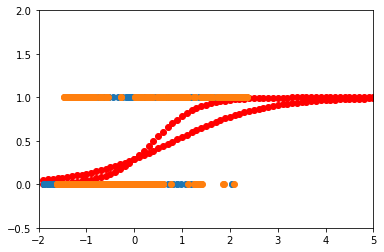

In [49]:
for i in range(1, 120):
    plt.plot(i/10.0 - 2, classifier(i/10.0 - 2), 'ro')
    
plt.plot(x, y, 'o')

plt.axis([-2,5,-0.5,2])
plt.show()

In [36]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([257, 143], dtype=int64))